# Actividad - Regresión Lineal

* **Nombre: Samantha Daniela Guanipa Ugas**
* **Matrícula: A01703936**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving presion.csv to presion.csv
User uploaded file "presion.csv" with length 772 bytes


In [4]:
df1 = pd.read_csv('presion.csv')
df1.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

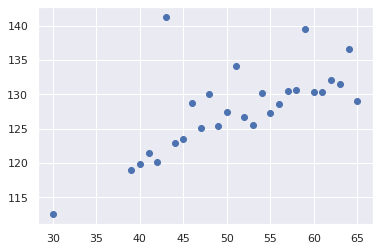

In [5]:
# Grafica la información de la edad y presión alta
plt.scatter(data=df1,x = 'Age', y = 'Average of ap_hi');

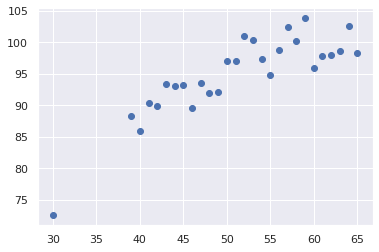

In [6]:
# Grafica la información de la edad y presión baja
plt.scatter(data=df1,x = 'Age', y = 'Average of ap_lo');

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

<ipython-input-22-3c4a854131c5>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model1.fit(df1['Age'][:, np.newaxis], df1['Average of ap_hi'])


Model slope:     0.47769702977669154
Model intercept: 103.3969740964366


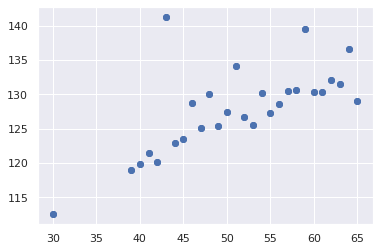

In [22]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?

model1 = LinearRegression(fit_intercept=True)

model1.fit(df1['Age'][:, np.newaxis], df1['Average of ap_hi'])

plt.scatter(data=df1,x = 'Age', y='Average of ap_hi')
plt.plot(df1['Age'], df1['Average of ap_hi'], 'o')

print("Model slope:    ", model1.coef_[0])
print("Model intercept:", model1.intercept_)

<ipython-input-23-bd041c613d40>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model2.fit(df1['Age'][:, np.newaxis], df1['Average of ap_lo'])


Model slope:     0.6089810580238237
Model intercept: 63.726200409422745


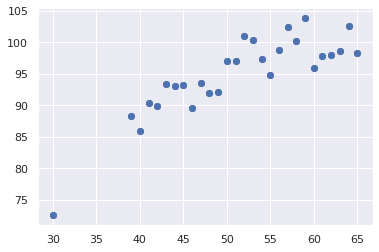

In [23]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?

model2 = LinearRegression(fit_intercept=True)

model2.fit(df1['Age'][:, np.newaxis], df1['Average of ap_lo'])

plt.scatter(data=df1,x = 'Age', y='Average of ap_lo')
plt.plot(df1['Age'], df1['Average of ap_lo'], 'o')

print("Model slope:    ", model2.coef_[0])
print("Model intercept:", model2.intercept_)

Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

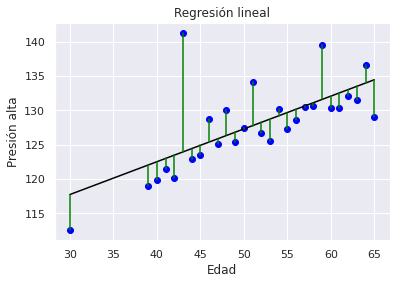

In [14]:
# Presión alta
x1 = df1[['Age']].values
y1 = df1['Average of ap_hi'].values

model1 = LinearRegression()
model1.fit(x1,y1)
prediccion1 = model1.predict(x1)

plt.scatter(x1,y1,color = 'blue')
plt.plot(x1,prediccion1, color = 'black')

for i in range(len(x1)):
  plt.plot([x1[i], x1[i]], [y1[i],prediccion1[i]],color='green')

plt.xlabel('Edad')
plt.ylabel('Presión alta')
plt.title('Regresión lineal')

plt.show() 





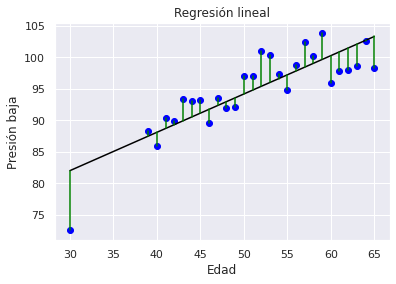

In [31]:
# Presión baja
x2 = df1[['Age']].values
y2 = df1['Average of ap_lo'].values

model2 = LinearRegression()
model2.fit(x2,y2)
prediccion2 = model2.predict(x2)

plt.scatter(x2,y2,color = 'blue')
plt.plot(x2,prediccion2, color = 'black')

for i in range(len(x2)):
  plt.plot([x2[i], x2[i]], [y2[i],prediccion2[i]],color='green')

plt.xlabel('Edad')
plt.ylabel('Presión baja')
plt.title('Regresión lineal')

plt.show() 

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [32]:
def pressure_low(age):

  presion1 = (model2.coef_[0]*age)+model2.intercept_
  return presion1

query_age= 76
pressure_low(query_age)

110.00876081923334

In [33]:
def pressure_high(age):

  presion = (model1.coef_[0]*age)+model1.intercept_
  

  return presion

query_age= 76
pressure_high(query_age)

139.70194835946515